In [1]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
import pandas as pd
from functools import partial
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
from termcolor import colored
warnings.filterwarnings("ignore")
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from IPython.display import Image 
import pydotplus
from six import StringIO
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import validation_curve 
from sklearn.preprocessing import StandardScaler

# Data Diabetes

In [2]:
df = pd.read_csv('diabetes.csv')
# importing the scaler
#from sklearn.preprocessing import StandardScaler

# creating a copy of dataframe
data = df
col_cols = list(data.columns)

# removing the target variable from the columns list
col_cols.pop() 



'Outcome'

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# There are no null values in the columns
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Clean data

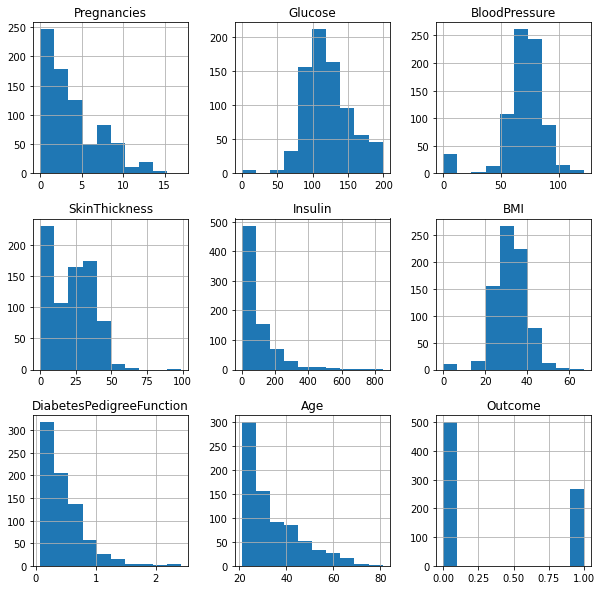

In [6]:
histo = df.hist(figsize = (10,10))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df = pd.read_csv('diabetes.csv')
# importing the scaler
#from sklearn.preprocessing import StandardScaler

# creating a copy of dataframe
data = df
col_cols = list(data.columns)

# removing the target variable from the columns list
col_cols.pop() 

'Outcome'

In [9]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [11]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [12]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

In [13]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [14]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

In [15]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [16]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [17]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [18]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [19]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [20]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [21]:
# separating the features and target 
X = data.drop(['Outcome'],axis=1)
y = data[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
print(f"The shape of X_train is      {colored(X_train.shape,'yellow')}")
print(f"The shape of X_test is       {colored(X_test.shape,'yellow')}")
print(f"The shape of y_train is      {colored(y_train.shape,'yellow')}")
print(f"The shape of y_test is       {colored(y_test.shape,'yellow')}")
#to plot a graph
gridaccuracies ={}
randomaccuracies ={} 
Train_accuracies ={}
Test_accuracies ={}

The shape of X_train is      (614, 8)
The shape of X_test is       (154, 8)
The shape of y_train is      (614, 1)
The shape of y_test is       (154, 1)


# Neural network with Random search

In [22]:
batch_size = [10,20,40,50,100]
epochs = [10,20,40,50,100]
optimizer=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid']
weight_constraint = [1,2,3,4,5]
dropout_rate = [0.0,0.1, 0.2,0.3, 0.4,0.5,0.6,0.7, 0.8]
learn_rate = [0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]
momentum = [0.0,0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7,0.8,0.9]
neurons = [1, 10, 20, 40,60]
param_random = dict(optimizer=optimizer,batch_size=batch_size, epochs=epochs,activation=activation
                  ,weight_constraint=weight_constraint,dropout_rate=dropout_rate,learn_rate=learn_rate
                  ,momentum=momentum,neurons=neurons)


In [23]:
def create_model(optimizer=optimizer,activation=activation,weight_constraint=weight_constraint,
                 dropout_rate=dropout_rate,learn_rate=0.01, momentum=0,neurons=neurons):
# create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [24]:
%%time
model = KerasClassifier(build_fn=create_model, verbose=1)
search_result = RandomizedSearchCV(estimator=model, param_distributions=param_random, n_iter=20, n_jobs=-1, cv=3)
search_result.fit(X_train,y_train)

means = search_result.cv_results_['mean_test_score']
stds = search_result.cv_results_['std_test_score']
params = search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
randomacc=search_result.best_score_ *100
randomaccuracies['Neural Networks Gridsearch']=randomacc


Epoch 1/40
62/62 [==============================] - 1s 2ms/step - loss: 0.6401 - accuracy: 0.6743
Epoch 2/40
62/62 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.7345
Epoch 3/40
62/62 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7622
Epoch 4/40
62/62 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7687
Epoch 5/40
62/62 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.7801
Epoch 6/40
62/62 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7899
Epoch 7/40
62/62 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8013
Epoch 8/40
62/62 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7866
Epoch 9/40
62/62 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8127
Epoch 10/40
62/62 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8160
Epoch 11/40
62/62 [

In [25]:
print("Best: %f using %s" % (search_result.best_score_, search_result.best_params_))

Best: 0.848565 using {'weight_constraint': 2, 'optimizer': 'SGD', 'neurons': 10, 'momentum': 0.1, 'learn_rate': 0.7, 'epochs': 40, 'dropout_rate': 0.1, 'batch_size': 10, 'activation': 'hard_sigmoid'}


In [26]:
result = KerasClassifier(build_fn = create_model, **search_result.best_params_)
history = result.fit(X_train,y_train,validation_data=(X_test, y_test))

Epoch 1/40
62/62 [==============================] - 1s 6ms/step - loss: 0.6624 - accuracy: 0.6270 - val_loss: 0.6998 - val_accuracy: 0.4416
Epoch 2/40
62/62 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7313 - val_loss: 0.4946 - val_accuracy: 0.7597
Epoch 3/40
62/62 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7590 - val_loss: 0.4741 - val_accuracy: 0.7597
Epoch 4/40
62/62 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.7736 - val_loss: 0.4984 - val_accuracy: 0.7273
Epoch 5/40
62/62 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.7899 - val_loss: 0.4452 - val_accuracy: 0.7922
Epoch 6/40
62/62 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.7752 - val_loss: 0.4463 - val_accuracy: 0.7922
Epoch 7/40
62/62 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.7932 - val_loss: 0.4526 - val_accuracy: 0.7727
Epoch 8/40
62/62 [==

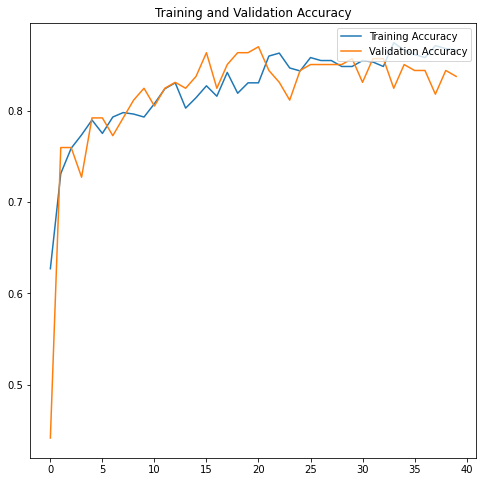

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(search_result.best_params_['epochs'])

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.legend(loc='upper right')


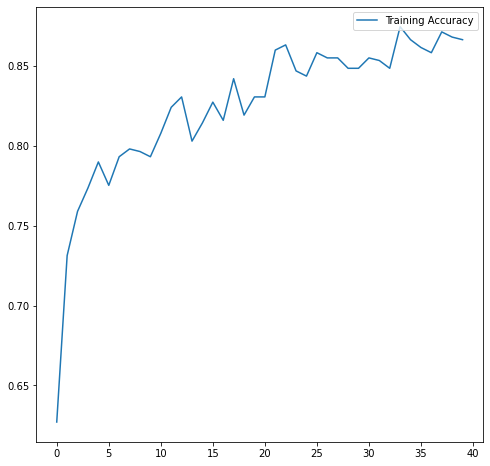

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(search_result.best_params_['epochs'])

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.legend(loc='upper right')


In [29]:
y_pred = search_result.predict(X_test)
y_pred =(y_pred>0.2)
list(y_pred)
Train_accuracy = search_result.score(X_train, y_train)*100
Train_accuracies['Neural network with Random search']=Train_accuracy
Test_accuracy = search_result.score(X_test, y_test)*100
Test_accuracies['Neural network with Random search']=Test_accuracy
print('Train_accuracy', Train_accuracy)
print('Test_accuracy', Test_accuracy)
print(precision_score(y_test, y_pred)*100, ": is the precision score")
print(recall_score(y_test, y_pred)*100, ": is the recall score")
print(f1_score(y_test, y_pred)*100, ": is the f1 score")

16/16 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8442
Train_accuracy 87.94788122177124
Test_accuracy 84.41558480262756
76.27118644067797 : is the precision score
81.81818181818183 : is the recall score
78.94736842105264 : is the f1 score


# Neural network with Grid search

In [30]:
batch_size = [50,100]
epochs = [10,20]
optimizer=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid']
weight_constraint = [1,5]
dropout_rate = [0.3, 0.8]
learn_rate = [0.1,0.9]
momentum = [0.2,0.8]
neurons = [10, 40]
param_grid = dict(optimizer=optimizer,batch_size=batch_size, epochs=epochs,activation=activation
                  ,weight_constraint=weight_constraint,dropout_rate=dropout_rate,learn_rate=learn_rate
                  ,momentum=momentum,neurons=neurons)


In [31]:
%%time
model = KerasClassifier(build_fn=create_model, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train,y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
gridacc=grid.best_score_ *100
gridaccuracies['Neural Networks Gridsearch']=gridacc



เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
0.653077 (0.021359) with: {'activation': 'softmax', 'batch_size': 50, 'dropout_rate': 0.8, 'epochs': 20, 'learn_rate': 0.1, 'momentum': 0.8, 'neurons': 40, 'optimizer': 'SGD', 'weight_constraint': 1}
0.653077 (0.021359) with: {'activation': 'softmax', 'batch_size': 50, 'dropout_rate': 0.8, 'epochs': 20, 'learn_rate': 0.1, 'momentum': 0.8, 'neurons': 40, 'optimizer': 'SGD', 'weight_constraint': 5}
0.653077 (0.021359) with: {'activation': 'softmax', 'batch_size': 50, 'dropout_rate': 0.8, 'epochs': 20, 'learn_rate': 0.1, 'momentum': 0.8, 'neurons': 40, 'optimizer': 'RMSprop', 'weight_constraint': 1}
0.653077 (0.021359) with: {'activation': 'softmax', 'batch_size': 50, 'dropout_rate': 0.8, 'epochs': 20, 'learn_rate': 0.1, 'momentum': 0.8, 'neurons': 40, 'optimizer': 'RMSprop', 'weight_constraint': 5}
0.653077 (0.021359) with: {'activation': 'softmax', 'batch_size': 50, 'dropout_rate': 0.8, 'epochs': 20, 'learn_rate': 0.1, 'momentum':

In [32]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.868125 using {'activation': 'tanh', 'batch_size': 50, 'dropout_rate': 0.3, 'epochs': 20, 'learn_rate': 0.9, 'momentum': 0.2, 'neurons': 40, 'optimizer': 'Nadam', 'weight_constraint': 1}


In [33]:
result = KerasClassifier(build_fn = create_model, **grid_result.best_params_)
history = result.fit(X_train,y_train,validation_data=(X_test, y_test))

Epoch 1/20
13/13 [==============================] - 2s 15ms/step - loss: 0.5086 - accuracy: 0.7622 - val_loss: 0.4498 - val_accuracy: 0.7922
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.7801 - val_loss: 0.4229 - val_accuracy: 0.7857
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.7866 - val_loss: 0.4222 - val_accuracy: 0.8182
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.4351 - accuracy: 0.7932 - val_loss: 0.4637 - val_accuracy: 0.8117
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.4094 - accuracy: 0.8127 - val_loss: 0.3725 - val_accuracy: 0.8506
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.3792 - accuracy: 0.8257 - val_loss: 0.4257 - val_accuracy: 0.8506
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.3799 - accuracy: 0.8274 - val_loss: 0.4809 - val_accuracy: 0.7922
Epoch 8/20
13/13 [=

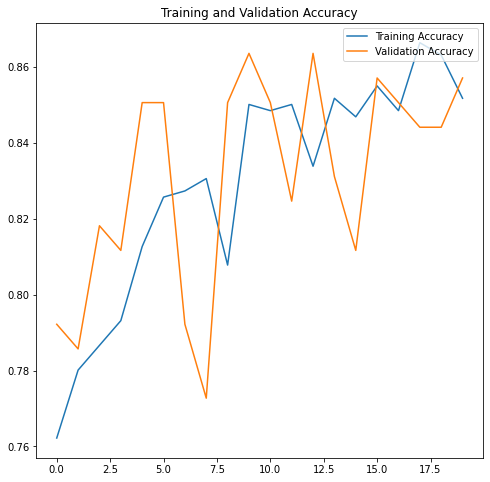

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(grid_result.best_params_['epochs'])

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.legend(loc='upper right')


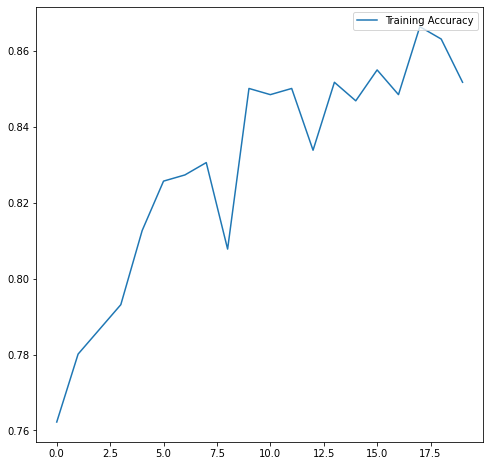

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(grid_result.best_params_['epochs'])

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.legend(loc='upper right')


In [36]:
y_pred = grid_result.predict(X_test)
y_pred =(y_pred>0.2)
list(y_pred)

Train_accuracy = grid_result.score(X_train, y_train)*100
Train_accuracies['Neural network with Grid search']=Train_accuracy
Test_accuracy = grid_result.score(X_test, y_test)*100
Test_accuracies['Neural network with Grid search']=Test_accuracy
print('Train_accuracy', Train_accuracy)
print('Test_accuracy', Test_accuracy)
print(precision_score(y_test, y_pred)*100, ": is the precision score")
print(recall_score(y_test, y_pred)*100, ": is the recall score")
print(f1_score(y_test, y_pred)*100, ": is the f1 score")

4/4 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8247
Train_accuracy 85.17915606498718
Test_accuracy 82.46753215789795
83.33333333333334 : is the precision score
63.63636363636363 : is the recall score
72.16494845360825 : is the f1 score


# Decision tree with Random search

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree_params = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14],
              'max_features':['auto','sqrt','log2'],
             }


dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
# predictions
dtree_predict = dtree.predict(X_test)

In [38]:
%%time
dtree_random = RandomizedSearchCV(estimator = dtree, param_distributions = dtree_params, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
dtree_random.fit(X_train, y_train)
# print results
print(dtree_random.best_params_)
randomacc=dtree_random.best_score_ *100
randomaccuracies['Decision tree Randomsearch']=randomacc

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'best', 'max_features': 'log2', 'max_depth': 4, 'criterion': 'entropy'}
CPU times: user 126 ms, sys: 4.07 ms, total: 130 ms
Wall time: 295 ms


In [39]:
y_pred = dtree_random.predict(X_test)
Train_accuracy = dtree_random.score(X_train, y_train)*100
Train_accuracies['Decision tree with Random search']=Train_accuracy
Test_accuracy = dtree_random.score(X_test, y_test)*100
Test_accuracies['Decision tree with Random search']=Test_accuracy
print('Train_accuracy', Train_accuracy)
print('Test_accuracy', Test_accuracy)
print(precision_score(y_test, y_pred)*100, ": is the precision score")
print(recall_score(y_test, y_pred)*100, ": is the recall score")
print(f1_score(y_test, y_pred)*100, ": is the f1 score")

Train_accuracy 87.62214983713355
Test_accuracy 83.11688311688312
77.35849056603774 : is the precision score
74.54545454545455 : is the recall score
75.92592592592592 : is the f1 score


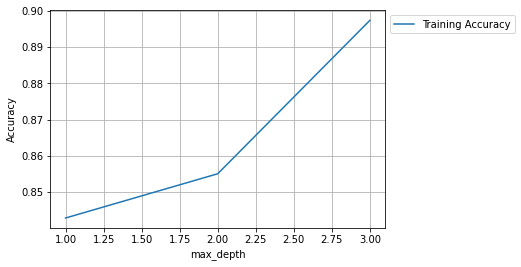

In [40]:
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name='max_depth', param_range=np.arange(dtree_random.best_params_['max_depth']),cv=3,scoring="accuracy")
train = train_scores.mean(axis=1)
valid = valid_scores.mean(axis=1)
ax = plt.gca()
ax.plot(np.arange(dtree_random.best_params_['max_depth']), train)
plt.xlabel('max_depth')
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"],bbox_to_anchor = (1,1))
plt.grid()
plt.show()

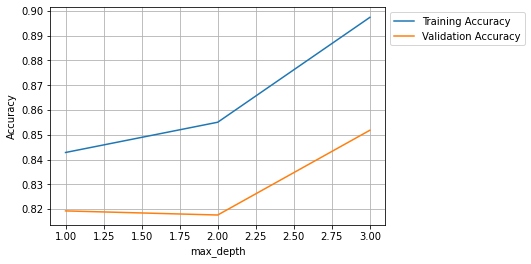

In [41]:
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name='max_depth', param_range=np.arange(dtree_random.best_params_['max_depth']),cv=3,scoring="accuracy")
train = train_scores.mean(axis=1)
valid = valid_scores.mean(axis=1)
ax = plt.gca()
ax.plot(np.arange(dtree_random.best_params_['max_depth']), train)
ax.plot(np.arange(dtree_random.best_params_['max_depth']), valid)
plt.xlabel('max_depth')
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"],bbox_to_anchor = (1,1))
plt.grid()
plt.show()

# Decision tree with Grid search

In [42]:
%%time
dtree_grid = GridSearchCV(estimator = dtree, param_grid = dtree_params, cv = 3, verbose=2, n_jobs = -1)

# Fit the model
dtree_grid.fit(X_train, y_train)
# print results
print(dtree_grid.best_params_)
gridacc=dtree_grid.best_score_ *100
gridaccuracies['Decision tree Gridsearch']=gridacc

Fitting 3 folds for each of 156 candidates, totalling 468 fits
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'splitter': 'best'}
CPU times: user 590 ms, sys: 14.5 ms, total: 605 ms
Wall time: 1.54 s


In [43]:
y_pred = dtree_grid.predict(X_test)
Train_accuracy = dtree_grid.score(X_train, y_train)*100
Train_accuracies['Decision tree with Grid search']=Train_accuracy
Test_accuracy = dtree_grid.score(X_test, y_test)*100
Test_accuracies['Decision tree with Grid search']=Test_accuracy
print('Train_accuracy', Train_accuracy)
print('Test_accuracy', Test_accuracy)
print(precision_score(y_test, y_pred)*100, ": is the precision score")
print(recall_score(y_test, y_pred)*100, ": is the recall score")
print(f1_score(y_test, y_pred)*100, ": is the f1 score")

Train_accuracy 98.69706840390879
Test_accuracy 83.76623376623377
76.78571428571429 : is the precision score
78.18181818181819 : is the recall score
77.47747747747748 : is the f1 score


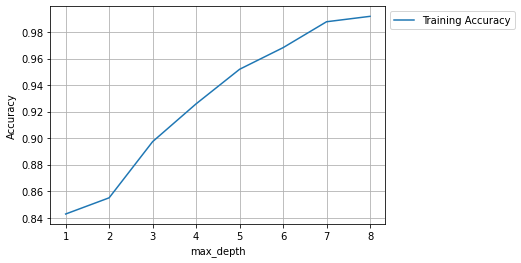

In [44]:
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name='max_depth', param_range=np.arange(dtree_grid.best_params_['max_depth']),cv=3,scoring="accuracy")
train = train_scores.mean(axis=1)
valid = valid_scores.mean(axis=1)
ax = plt.gca()
ax.plot(np.arange(dtree_grid.best_params_['max_depth']), train)
plt.xlabel('max_depth')
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"],bbox_to_anchor = (1,1))
plt.grid()
plt.show()

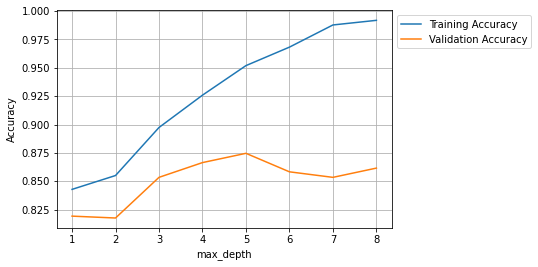

In [45]:
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, param_name='max_depth', param_range=np.arange(dtree_grid.best_params_['max_depth']),cv=3,scoring="accuracy")
train = train_scores.mean(axis=1)
valid = valid_scores.mean(axis=1)
ax = plt.gca()
ax.plot(np.arange(dtree_grid.best_params_['max_depth']), train)
ax.plot(np.arange(dtree_grid.best_params_['max_depth']), valid)
plt.xlabel('max_depth')
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"],bbox_to_anchor = (1,1))
plt.grid()
plt.show()

# Random forest with Random search

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(0, 15, num = 11)]
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
grid_search= {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters

In [47]:
%%time
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)
randomacc=rfc_random.best_score_ *100
randomaccuracies['Random Forest Randomsearch']=randomacc

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 13}
CPU times: user 1.1 s, sys: 53.9 ms, total: 1.16 s
Wall time: 1min 16s


In [48]:
y_pred = rfc_random.predict(X_test)
Train_accuracy = rfc_random.score(X_train, y_train)*100
Train_accuracies['Random forest with Random search']=Train_accuracy
Test_accuracy = rfc_random.score(X_test, y_test)*100
Test_accuracies['Random forest with Random search']=Test_accuracy
print('Train_accuracy', Train_accuracy)
print('Test_accuracy', Test_accuracy)
print(precision_score(y_test, y_pred)*100, ": is the precision score")
print(recall_score(y_test, y_pred)*100, ": is the recall score")
print(f1_score(y_test, y_pred)*100, ": is the f1 score")

Train_accuracy 100.0
Test_accuracy 87.66233766233766
81.03448275862068 : is the precision score
85.45454545454545 : is the recall score
83.1858407079646 : is the f1 score


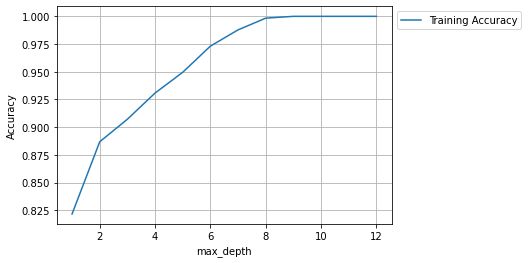

In [49]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(), X_train, y_train, param_name='max_depth', param_range=np.arange(rfc_random.best_params_['max_depth']),cv=3,scoring="accuracy")
train = train_scores.mean(axis=1)
valid = valid_scores.mean(axis=1)
ax = plt.gca()
ax.plot(np.arange(rfc_random.best_params_['max_depth']), train)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"],bbox_to_anchor = (1,1))
plt.grid()
plt.show()


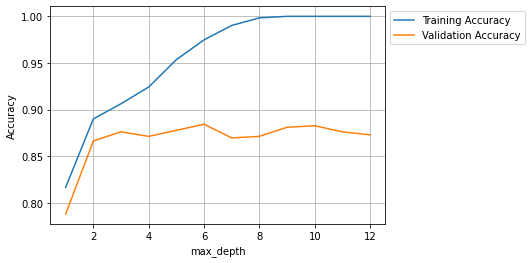

In [50]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(), X_train, y_train, param_name='max_depth', param_range=np.arange(rfc_random.best_params_['max_depth']),cv=3,scoring="accuracy")
train = train_scores.mean(axis=1)
valid = valid_scores.mean(axis=1)
ax = plt.gca()
ax.plot(np.arange(rfc_random.best_params_['max_depth']), train)
ax.plot(np.arange(rfc_random.best_params_['max_depth']), valid)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"],bbox_to_anchor = (1,1))
plt.grid()
plt.show()


# Random forest with Grid search

In [51]:
%%time
rfc_grid = GridSearchCV(estimator = rfc, param_grid = grid_search, cv = 3, verbose=2, n_jobs = -1)
# Fit the model
rfc_grid.fit(X_train, y_train)
# print results
print(rfc_grid.best_params_)
gridacc=rfc_grid.best_score_ *100
gridaccuracies['Random Forest Gridsearch']=gridacc

Fitting 3 folds for each of 220 candidates, totalling 660 fits
{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
CPU times: user 8.71 s, sys: 610 ms, total: 9.32 s
Wall time: 15min 11s


In [52]:
y_pred = rfc_grid.predict(X_test)
Train_accuracy = rfc_grid.score(X_train, y_train)*100
Train_accuracies['Random forest with Grid search']=Train_accuracy
Test_accuracy = rfc_grid.score(X_test, y_test)*100
Test_accuracies['Random forest with Grid search']=Test_accuracy
print('Train_accuracy', Train_accuracy)
print('Test_accuracy', Test_accuracy)
print(precision_score(y_test, y_pred)*100, ": is the precision score")
print(recall_score(y_test, y_pred)*100, ": is the recall score")
print(f1_score(y_test, y_pred)*100, ": is the f1 score")


Train_accuracy 100.0
Test_accuracy 86.36363636363636
77.41935483870968 : is the precision score
87.27272727272727 : is the recall score
82.05128205128204 : is the f1 score


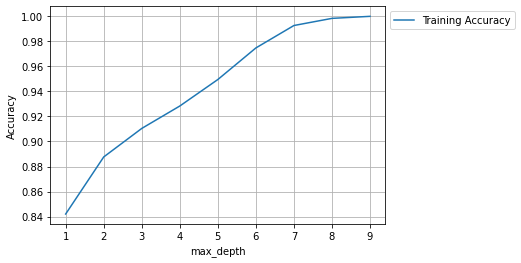

In [53]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(), X_train, y_train, param_name='max_depth', param_range=np.arange(rfc_grid.best_params_['max_depth']),cv=3,scoring="accuracy")
train = train_scores.mean(axis=1)
valid = valid_scores.mean(axis=1)
ax = plt.gca()
ax.plot(np.arange(rfc_grid.best_params_['max_depth']), train)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"],bbox_to_anchor = (1,1))
plt.grid()
plt.show()


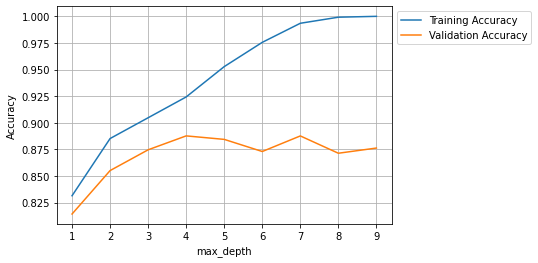

In [54]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(), X_train, y_train, param_name='max_depth', param_range=np.arange(rfc_grid.best_params_['max_depth']),cv=3,scoring="accuracy")
train = train_scores.mean(axis=1)
valid = valid_scores.mean(axis=1)
ax = plt.gca()
ax.plot(np.arange(rfc_grid.best_params_['max_depth']), train)
ax.plot(np.arange(rfc_grid.best_params_['max_depth']), valid)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"],bbox_to_anchor = (1,1))
plt.grid()
plt.show()


# Naive bayes with Random search

In [55]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [56]:
%%time
nbModel_random = RandomizedSearchCV(estimator=GaussianNB(), param_distributions=param_grid_nb,n_iter = 20, verbose=1, cv=3, n_jobs=-1)
nbModel_random.fit(X_train, y_train)
print(nbModel_random.best_estimator_)

GaussianNB()
randomacc=nbModel_random.best_score_ *100
randomaccuracies['Naive bayes Randomsearch']=randomacc

Fitting 3 folds for each of 20 candidates, totalling 60 fits
GaussianNB(var_smoothing=0.3511191734215131)
CPU times: user 105 ms, sys: 5.06 ms, total: 110 ms
Wall time: 192 ms


In [57]:
y_pred = nbModel_random.predict(X_test)
Train_accuracy = nbModel_random.score(X_train, y_train)*100
Train_accuracies['Naive bayes with Random search']=Train_accuracy
Test_accuracy = nbModel_random.score(X_test, y_test)*100
Test_accuracies['Naive bayes with Random search']=Test_accuracy
print('Train_accuracy', Train_accuracy)
print('Test_accuracy', Test_accuracy)
print(precision_score(y_test, y_pred)*100, ": is the precision score")
print(recall_score(y_test, y_pred)*100, ": is the recall score")
print(f1_score(y_test, y_pred)*100, ": is the f1 score")

Train_accuracy 77.19869706840392
Test_accuracy 77.27272727272727
67.85714285714286 : is the precision score
69.0909090909091 : is the recall score
68.46846846846847 : is the f1 score


# Naive bayes with Grid search

In [58]:
%%time
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=3, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

GaussianNB()
gridacc=nbModel_grid.best_score_ *100
gridaccuracies['Naive bayes Gridsearch']=gridacc

Fitting 3 folds for each of 100 candidates, totalling 300 fits
GaussianNB(var_smoothing=0.3511191734215131)
CPU times: user 380 ms, sys: 9.18 ms, total: 389 ms
Wall time: 802 ms


In [59]:
y_pred = nbModel_grid.predict(X_test)
Train_accuracy = nbModel_grid.score(X_train, y_train)*100
Train_accuracies['Naive bayes with Grid search']=Train_accuracy
Test_accuracy = nbModel_grid.score(X_test, y_test)*100
Test_accuracies['Naive bayes with Grid search']=Test_accuracy
print('Train_accuracy', Train_accuracy)
print('Test_accuracy', Test_accuracy)
print(precision_score(y_test, y_pred)*100, ": is the precision score")
print(recall_score(y_test, y_pred)*100, ": is the recall score")
print(f1_score(y_test, y_pred)*100, ": is the f1 score")

Train_accuracy 77.19869706840392
Test_accuracy 77.27272727272727
67.85714285714286 : is the precision score
69.0909090909091 : is the recall score
68.46846846846847 : is the f1 score


# Result: Grid search vs Random search

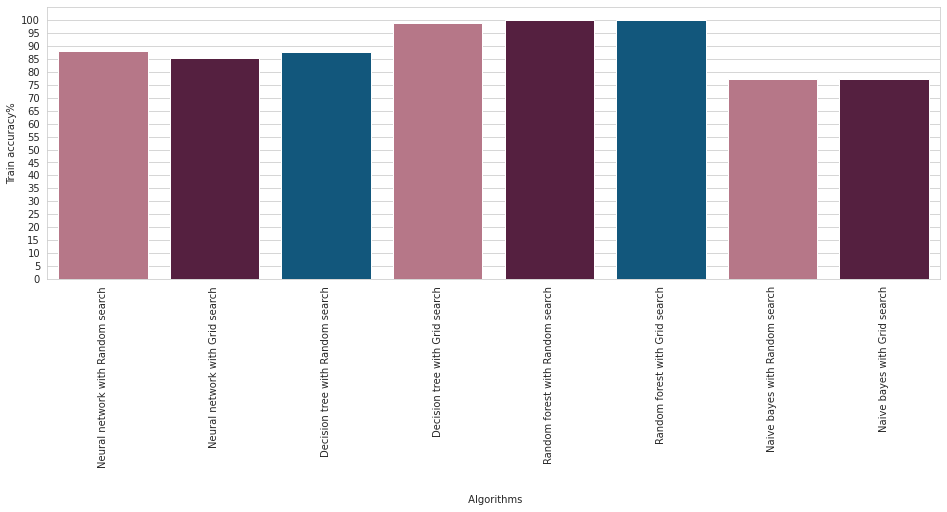

In [60]:
colors = ["#C06C84", "#5E1742", "#005D8E"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Train accuracy%")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(Train_accuracies.keys()), y=list(Train_accuracies.values()), palette=colors)
plt.xticks(rotation='vertical')
plt.show()

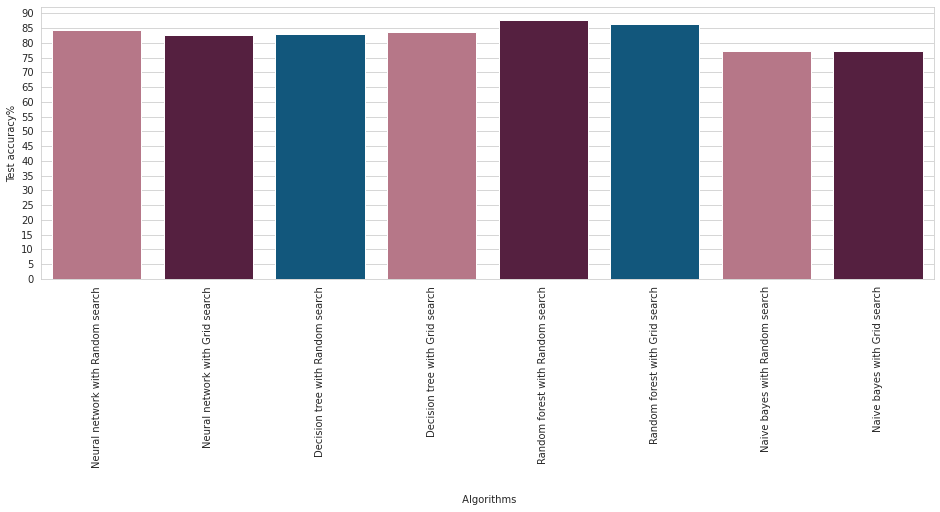

In [61]:
colors = ["#C06C84", "#5E1742", "#005D8E"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Test accuracy%")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(Test_accuracies.keys()), y=list(Test_accuracies.values()), palette=colors)
plt.xticks(rotation='vertical')
plt.show()